## Bayesian inference
The following notebook is a review of the key elements involved in a Bayesian Inference. The attempt is made to let you know the most fundemental means in Pattern Recognition. 

In order to make it successful, the code works make some examples to help you to show the theme by making abstract into concrete.

## Math konwledge

*If we use English words to discribe Bayesian formula:*

$ posterior = \frac{likelihood * prior}{evidence} $

$ \color{orange}{Minimum-error-rate classification:} $

$If$ $ P(\omega_1|x) > P(\omega_2|x) $, $then$ $ x \in \omega_1 $;

$If$ $ P(\omega_1|x) < P(\omega_2|x) $, $then$ $ x \in \omega_2 $.

Bayesian formula: $ P(\omega_i|X) = \frac{P(X|\omega_i)P(\omega_i)}{P(X)} $

$ \color{orange}{Minimum risk Bayes decision making:} $

$If$ $ R(a_k|x) = \min\limits_{i = 1, 2, ……, M}R(a_i|x)$ $,then$ $ x\in \omega_k $


In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stats
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 加载数据集
def load_dataset():
    iris = datasets.load_iris()
    return iris
# 划分数据集为数据和对应类别
def split_dataset(dataset):
    X = dataset.data[:, 0: 4].astype(float)
    Y = dataset.target
    validation_size = 0.20
    X_train, X_validation, Y_train, Y_validation = \
            model_selection.train_test_split(X, Y, test_size=validation_size)
    return X_train, X_validation, Y_train, Y_validation
# 将每一类的每个属性划分出来，便于计算
def split_out_attributes(X, Y):
    c1_1 = c1_2 = c1_3 = c1_4 = []
    c2_1 = c2_2 = c2_3 = c2_4 = []
    c3_1 = c3_2 = c3_3 = c3_4 = []
    for i in range(len(Y)):
        if (Y[i] == 0):
            c1_1.append(X[i, 0])
            c1_2.append(X[i, 1])
            c1_3.append(X[i, 2])
            c1_4.append(X[i, 3])
        elif (Y[i] == 1):
            c2_1.append(X[i, 0])
            c2_2.append(X[i, 1])
            c2_3.append(X[i, 2])
            c2_4.append(X[i, 3])
        elif (Y[i] == 2):
            c3_1.append(X[i, 0])
            c3_2.append(X[i, 1])
            c3_3.append(X[i, 2])
            c3_4.append(X[i, 3])
        else:
            pass
    return [c1_1, c1_2, c1_3, c1_4,
            c2_1, c2_2, c2_3, c2_4,
            c3_1, c3_2, c3_3, c3_4]
# 计算每一类的期望
def cal_mean(attributes):
    c1_1, c1_2, c1_3, c1_4, c2_1, c2_2, c2_3, c2_4, c3_1, c3_2, c3_3, c3_4 = attributes
        # 第一类的期望值μ
    e_c1_1 = np.mean(c1_1)
    e_c1_2 = np.mean(c1_2)
    e_c1_3 = np.mean(c1_3)
    e_c1_4 = np.mean(c1_4)
        # 第二类的期望值μ
    e_c2_1 = np.mean(c2_1)
    e_c2_2 = np.mean(c2_2)
    e_c2_3 = np.mean(c2_3)
    e_c2_4 = np.mean(c2_4)
        # 第三类的期望值μ
    e_c3_1 = np.mean(c3_1)
    e_c3_2 = np.mean(c3_2)
    e_c3_3 = np.mean(c3_3)
    e_c3_4 = np.mean(c3_4)
    return [e_c1_1, e_c1_2, e_c1_3, e_c1_4,
            e_c2_1, e_c2_2, e_c2_3, e_c2_4,
            e_c3_1, e_c3_2, e_c3_3, e_c3_4]
# 计算每一类的方差
def cal_var(attributes):
    c1_1, c1_2, c1_3, c1_4, c2_1, c2_2, c2_3, c2_4, c3_1, c3_2, c3_3, c3_4 = attributes
 
    # 第一类的方差var
    var_c1_1 = np.var(c1_1)
    var_c1_2 = np.var(c1_2)
    var_c1_3 = np.var(c1_3)
    var_c1_4 = np.var(c1_4)
    # 第二类的方差s
    var_c2_1 = np.var(c2_1)
    var_c2_2 = np.var(c2_2)
    var_c2_3 = np.var(c2_3)
    var_c2_4 = np.var(c2_4)
    # 第三类的方差s
    var_c3_1 = np.var(c3_1)
    var_c3_2 = np.var(c3_2)
    var_c3_3 = np.var(c3_3)
    var_c3_4 = np.var(c3_4)
    return [var_c1_1, var_c1_2, var_c1_3, var_c1_4,
            var_c2_1, var_c2_2, var_c2_3, var_c2_4,
            var_c3_1, var_c3_2, var_c3_3, var_c3_4]
# 计算先验概率
def cal_prior_probability(Y):
    a = b = c = 0
    for i in Y:
        if (i == 0):
            a += 1
        elif (i == 1):
            b += 1
        elif (i == 2):
            c += 1
        else:
            pass
    pa = a / len(Y)
    pb = b / len(Y)
    pc = c / len(Y)
    return pa, pb, pc

def cal_posteriori_probability(X, Y, p, means, vars):
    pa, pb, pc = p
    e_c1_1, e_c1_2, e_c1_3, e_c1_4, e_c2_1, e_c2_2, e_c2_3, e_c2_4, e_c3_1, e_c3_2, e_c3_3, e_c3_4 = means
    var_c1_1, var_c1_2, var_c1_3, var_c1_4, var_c2_1, var_c2_2, var_c2_3, var_c2_4, var_c3_1, var_c3_2, var_c3_3, var_c3_4 = vars
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    X4 = X[:, 3]
    Y_validation_new = []
    true_test = 0
    false_test = 0
    for i in range(len(X1)):
        # 计算后验概率=P(X|Y=C1)P(Y=C1)
        P_1 = stats.norm.pdf(X1[i], e_c1_1, var_c1_1) * stats.norm.pdf(X2[i], e_c1_2, var_c1_2) * stats.norm.pdf(
            X3[i], e_c1_3,
            var_c1_3) * stats.norm.pdf(
            X4[i], e_c1_4, var_c1_4) * pa
        # 计算后验概率=P(X|Y=C2)P(Y=C2)
        P_2 = stats.norm.pdf(X1[i], e_c2_1, var_c2_1) * stats.norm.pdf(X2[i], e_c2_2, var_c2_2) * stats.norm.pdf(
            X3[i], e_c2_3,
            var_c2_3) * stats.norm.pdf(
            X4[i], e_c2_4, var_c2_4) * pb
        # 计算后验概率=P(X|Y=C3)P(Y=C3)
        P_3 = stats.norm.pdf(X1[i], e_c3_1, var_c3_1) * stats.norm.pdf(X2[i], e_c3_2, var_c3_2) * stats.norm.pdf(
            X3[i], e_c3_3,
            var_c3_3) * stats.norm.pdf(
            X4[i], e_c3_4, var_c3_4) * pc
        # 计算判别函数，选取概率最大的类
        max_P = max(P_1, P_2, P_3)
        if (max_P == P_1):
            Y_validation_new.append(0)
            if (Y[i] == 0):
                true_test += 1
            else:
                false_test += 1
        elif (max_P == P_2):
            Y_validation_new.append(1)
            if (Y[i] == 1):
                true_test += 1     
            else:
                false_test += 1
        elif (max_P == P_3):
            Y_validation_new.append(2)
            if (Y[i] == 2):
                true_test += 1
            else:
                false_test += 1
        else:
            false_test += 1
    return Y_validation_new

def paint_train(X_train, Y_train):            
    x1 = X_train[Y_train == 0, 0]
    y1 = X_train[Y_train == 0, 1]
    z1 = X_train[Y_train == 0, 2]
    x2 = X_train[Y_train == 1, 0]
    y2 = X_train[Y_train == 1, 1]
    z2 = X_train[Y_train == 1, 2]
    x3 = X_train[Y_train == 2, 0]
    y3 = X_train[Y_train == 2, 1]
    z3 = X_train[Y_train == 2, 2]
    ax = plt.subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c = 'red')
    ax.scatter(x2, y2, z2, c = 'blue')
    ax.scatter(x3, y3, z3, c = 'green')
    plt.show()
    
def paint_validation(X_validation, Y_validation):            
    x1 = X_validation[Y_validation == 0, 0]
    y1 = X_validation[Y_validation == 0, 1]
    z1 = X_validation[Y_validation == 0, 2]
    x2 = X_validation[Y_validation == 1, 0]
    y2 = X_validation[Y_validation == 1, 1]
    z2 = X_validation[Y_validation == 1, 2]
    x3 = X_validation[Y_validation == 2, 0]
    y3 = X_validation[Y_validation == 2, 1]
    z3 = X_validation[Y_validation == 2, 2]
    ax = plt.subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c = 'red')
    ax.scatter(x2, y2, z2, c = 'blue')
    ax.scatter(x3, y3, z3, c = 'green')
    plt.show()

绘制训练集三维图像

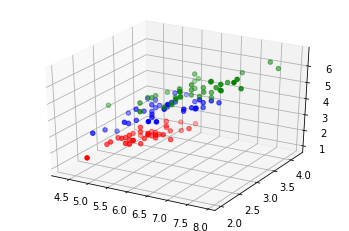

In [2]:
%matplotlib inline
dataset = load_dataset()
X_train, X_validation, Y_train, Y_validation = split_dataset(dataset)
paint_train(X_train, Y_train)

绘制测试集正确三维图像

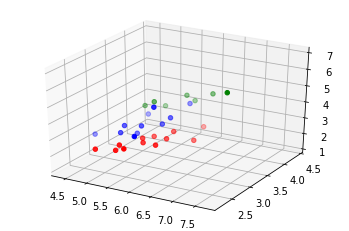

In [3]:
%matplotlib inline
attributes = split_out_attributes(X_train, Y_train)
means = cal_mean(attributes)
vars = cal_var(attributes)
prior_p = cal_prior_probability(Y_train)
Y_validation_new = cal_posteriori_probability(X_validation, Y_validation, prior_p, means, vars)
paint_validation(X_validation, Y_validation)

绘制测试集预测三维图像

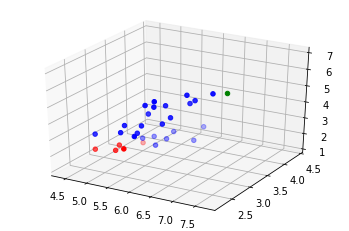

In [4]:
%matplotlib inline
Y1 = np.array(Y_validation_new)
paint_validation(X_validation, Y1)

正态分布贝叶斯决策二维决策面部分展示

$ P(\omega_i|X) = \frac{P(X|\omega_i)P(\omega_i)}{\sum_{j=1}^M P(X|\omega_j)P(\omega_j)} = \frac{P(X|\omega_i)P(\omega_i)}{P(X)} $

$ p(x)=\frac{1}{\sqrt{2\pi}\sigma} exp[-\frac{1}{2}(\frac{x-\mu}{\sigma})^2] = N(\mu,\sigma^2)$

$ \sigma^2 = E(x) = \int_{-\infty}^\infty xp(x)dx$

In [5]:
#
import numpy as np
import math
import matplotlib.pyplot as plt
#
classAData = [[0, 2, 1], [0, 1, 0]]
classBData = [[-1, -2, -2], [1, 0, -1]]
classA = np.array(classAData, dtype = np.float64)
classB = np.array(classBData, dtype = np.float64)
PirorclassA = 1/2
PirorclassB = 1/2

AMat = np.matrix(classA)
ACovMat = np.matrix(np.cov(AMat))
ACovDet = np.linalg.det(np.cov(AMat))
ACovInv = ACovMat.I
Amu = np.array([[1], [1/3]], dtype=np.float64)
vA = -1/2 * ACovInv
omegaA = ACovInv * Amu
omegaA0 = -1/2 * np.matrix(Amu).T * ACovInv * Amu - 1/2 * math.log(abs(ACovDet)) + math.log(PirorclassA)

BMat = np.matrix(classB)
BCovMat = np.matrix(np.cov(BMat))
BCovDet = np.linalg.det(np.cov(BMat))
BCovInv = BCovMat.I
Bmu = np.array([[-5/3], [0]], dtype=np.float64)
vB = -1/2 * BCovInv
omegaB = BCovInv * Bmu
omegaB0 = -1/2 * np.matrix(Bmu).T * BCovInv * Amu - 1/2 * math.log(abs(BCovDet)) + math.log(PirorclassB)
#
AllCov = ACovMat + BCovMat
AllCovInv = AllCov.I
omegaAall = AllCovInv * Amu
omegaA0all = -1/2 * np.matrix(Amu).T * AllCovInv * Amu + math.log(PirorclassA)
omegaBall = AllCovInv * Bmu
omegaB0all = -1/2 * np.matrix(Bmu).T * AllCovInv * Bmu + math.log(PirorclassB)
omegaABall = omegaAall - omegaBall
#
x = np.arange(-10.1, 10.1, .01)
y = np.arange(-10.1, 10.1, .01)
x, y = np.meshgrid(x, y)
x1Mean = [0, 0]
x2Mean = [2/3, -1]

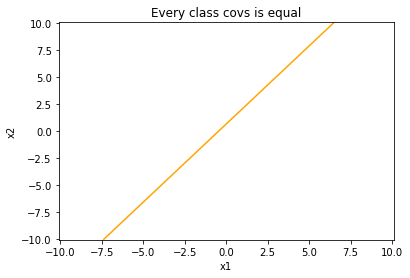

In [6]:
f = omegaABall[0, 0]*x + omegaABall[1, 0]*y + (omegaA0all-omegaB0all)
plt.figure()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Every class covs is equal')
plt.contour(x, y, f, 0, colors='orange')
plt.show()

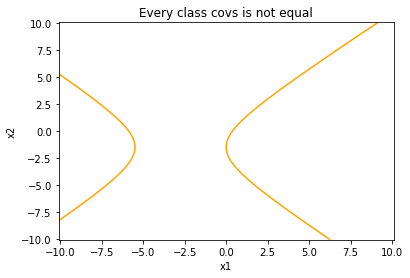

In [7]:
vAB = vA - vB
omegaAB = omegaA - omegaB
g = (vAB[0, 0])*(x**2) + (vAB[1, 1])*(y**2) + (vAB[0, 1] + vAB[1, 0])*(x*y) + omegaAB[0, 0]*x + omegaAB[1, 0]*y + (omegaA0-omegaB0)
plt.figure()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Every class covs is not equal')
plt.contour(x, y, g, 0, colors='orange')
plt.show()